# 4 - Regressão Logística e Classificação
Considere um conjunto de dados obtidos analisando imagens de câncer de mama, onde há o diagnóstico se o tumor é maligno ou benigno. Seu objetivo é desenvolver e avaliar modelos para realizar a classificação de câncer de mama em Maligno (1) ou Benigno (0). Esse modelo deve ter uma saída probabilística que indique a probabilidade de um tumor ser maligno. Você deverá cumprir os seguintes requerimentos:

1. Carregue o conjunto de dados Breast Cancer Wisconsin (Diagnostic) Data Set. Ele pode ser obtido através do sklearn.datasets, da UCI Machine Learning Repository ou do Kaggle.
2. Realize uma breve análise exploratória dos dados, criando ao menos 3 gráficos. Há desbalanceamento entre as classes? Extra: quais atributos são mais importantes para classificação?
3. Separe os dados em conjuntos de treino e teste, usando random_state = 42. Os dados de treino podem ser subdivididos em treino e validação de forma livre para ajustar hiperparâmetros.
4. Treine e avalie no conjunto de teste um modelo de regressão logística usando hiperparâmetros default e todos os dados de entrada, como baseline de desempenho. Lembre-se de normalizar os dados de entrada. As métricas de avaliação serão Acurácia, Precision, Recall, F1 score e AUC.
5. Treine pelo menos mais 3 modelos de regressão logística diferentes, treinando e avaliando nos conjuntos de treino e validação. Modelos diferentes incluem usar atributos diferentes, transformações não-lineares nos atributos (regressão logística polinomial) ou diferentes hiperparâmetros. Após isso, escolha o melhor desses modelos para retreinar com todos os dados de treino e avalie no conjunto de teste. Compare com o resultado com a baseline. Dica: pode-se utilizar o grid search.
6. Extra: utilize um modelo ainda não estudado na mentoria para realizar a classificação, avaliando no conjunto de teste. Compare os resultados.

###### Carregue o conjunto de dados Breast Cancer Wisconsin (Diagnostic) Data Set. Ele pode ser obtido através do sklearn.datasets, da UCI Machine Learning Repository ou do Kaggle.

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
from sklearn.datasets import load_breast_cancer

dataset_cancer = load_breast_cancer()

print(dataset_cancer['DESCR']) #descrição do dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [308]:
df_cancer = pd.DataFrame(np.c_[dataset_cancer['data'], dataset_cancer['target']], columns = np.append(dataset_cancer['feature_names'], ['target']))
df_cancer_target = pd.Series(dataset_cancer.target) # Somente rótulos
df_cancer_feature = df_cancer.drop(['target'], axis = 1) #Somente features  
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


###### Realize uma breve análise exploratória dos dados, criando ao menos 3 gráficos. Há desbalanceamento entre as classes? Extra: quais atributos são mais importantes para classificação?

In [309]:
# Não há nenhum valor ausente, todas as colunas têm 569 valores. Isso nos economiza tempo de ter que considerar os valores ausentes.
# Todos os tipos de dados são numéricos.
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [310]:
#df = df_cancer['target']==1
#df.value_counts()
#abaixo eu estou pegando e contando as targets e definindo os nomes das duas 
x=pd.Series(df_cancer_target.value_counts(ascending=True))
x.index="Maligno Benigno".split()
x
# MALIGNO É 0 E BENIGNO É 1
#Podemos observar que há uma maior quantidade de diagnóstico de tumores benignos, logo há um desbalanceamento entre as classes.

Maligno    212
Benigno    357
dtype: int64

In [311]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


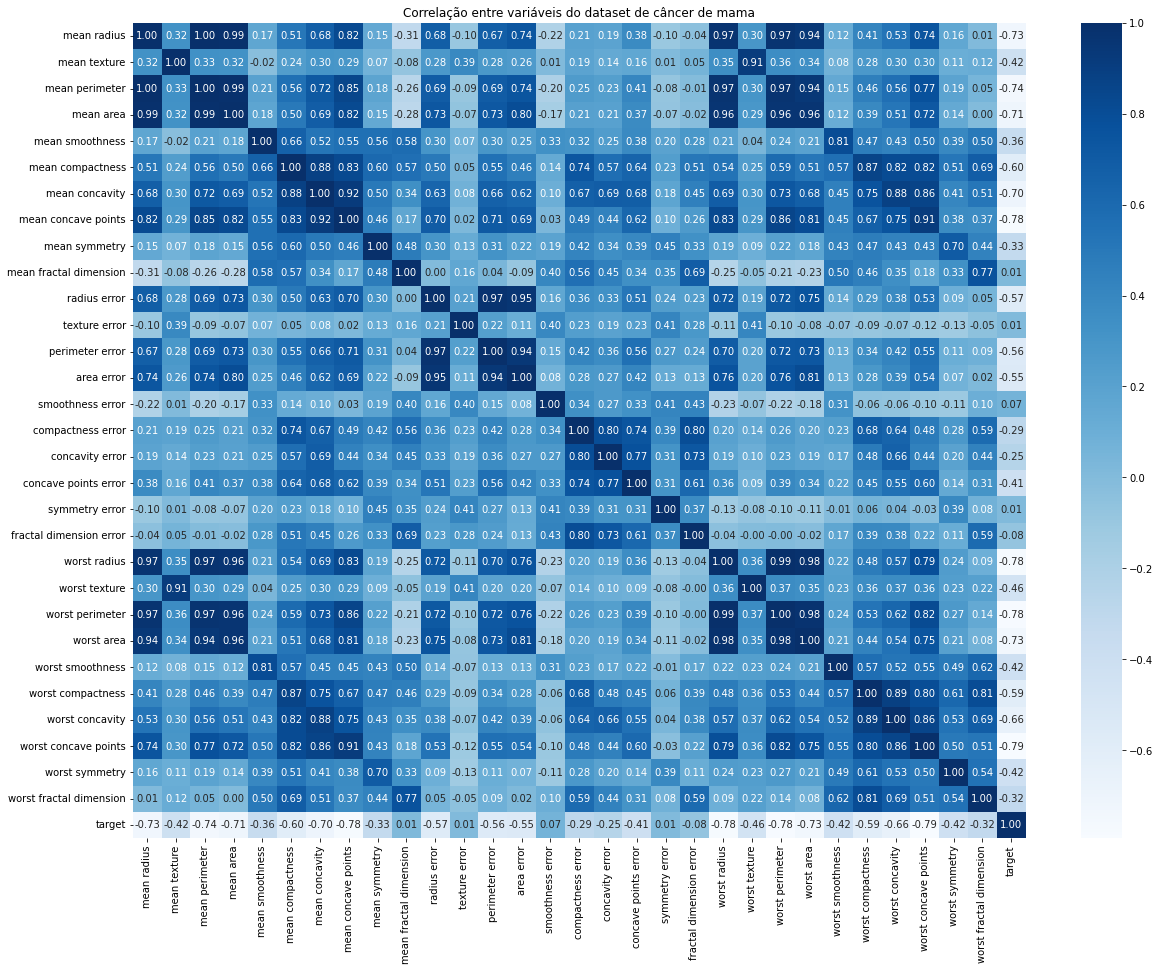

In [312]:
# Visualização 1
#Matriz de Correlação dos atributos com o rótulo
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(),
            annot = True,
            fmt = '.2f',#deixando em duas casas decimais
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de câncer de mama')
plt.show()

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

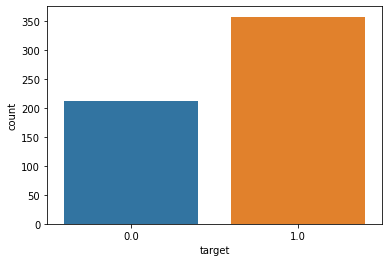

In [313]:
import warnings
warnings.filterwarnings("ignore")
# Visualização 2
sns.countplot(df_cancer['target'])

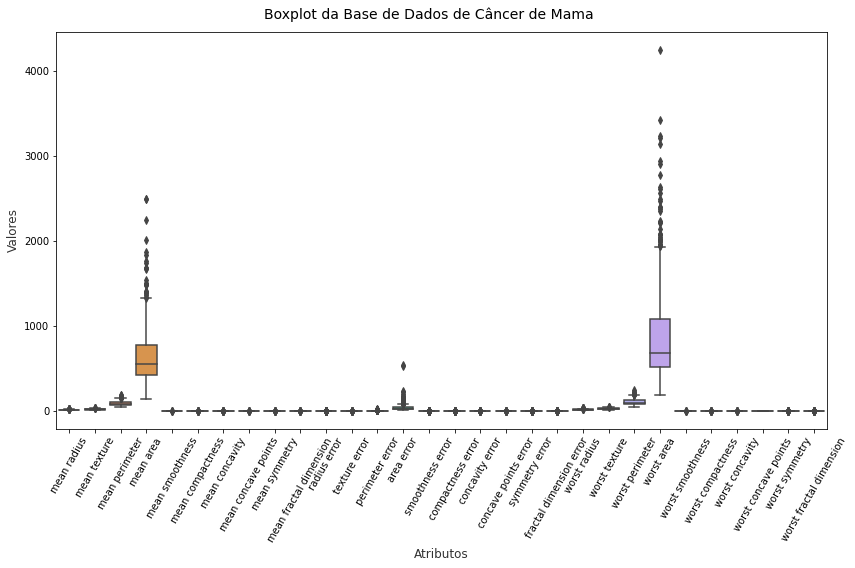

In [314]:
# Visualização 3
# Tamanho da figura
figsize=(12,8)
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Boxplot da Base de Dados de Câncer de Mama', fontsize=14)

sns.boxplot(data=df_cancer_feature,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

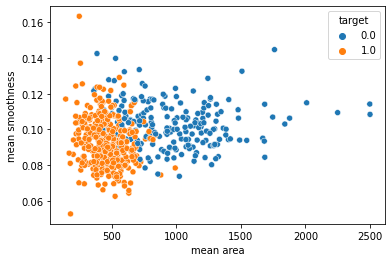

In [315]:
# Visualização 4
# Suavidade e área dos tumores foram os atributos escolhidos para essa visualização
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)
# Os pontos azuis aqui é o caso maligno. A laranja aponta aqui que é o caso benigno.

###### Separe os dados em conjuntos de treino e teste, usando random_state = 42. Os dados de treino podem ser subdivididos em treino e validação de forma livre para ajustar hiperparâmetros.

In [358]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn import metrics
X = df_cancer_feature
y = df_cancer_target.to_numpy().reshape(-1,1)

In [317]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)

#Utilizando o método de MinMAx do sklearn
scaler = MinMaxScaler()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

###### Treine e avalie no conjunto de teste um modelo de regressão logística usando hiperparâmetros default e todos os dados de entrada, como baseline de desempenho. Lembre-se de normalizar os dados de entrada. As métricas de avaliação serão Acurácia, Precision, Recall, F1 score e AUC.

### Modelo 1 -- Baseline

In [318]:
model = LogisticRegression()
model.fit(x_train_norm,y_train_norm.ravel())
y_pred = model.predict(x_val_norm).reshape(-1,1)

In [319]:
# Acurácia individualmente
metrics.accuracy_score(y_val_norm,y_pred)  

0.9340659340659341

In [320]:
# Resultados de Precisão, Recall, F1-Score e Acurácia
target_names = ['Maligno', 'Benigno']
print(metrics.classification_report(y_val_norm,y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Maligno       1.00      0.80      0.89        30
     Benigno       0.91      1.00      0.95        61

    accuracy                           0.93        91
   macro avg       0.96      0.90      0.92        91
weighted avg       0.94      0.93      0.93        91



<AxesSubplot:>

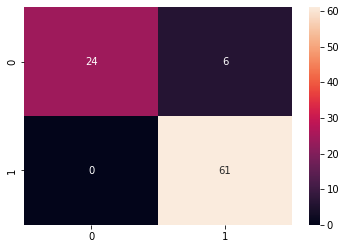

In [321]:
#Matriz de Confusão
cm = metrics.confusion_matrix(y_val_norm,y_pred)
sns.heatmap(cm, annot=True, fmt = 'd')

In [322]:
print("AUC: %f\n" %(metrics.roc_auc_score(y_val_norm,y_pred)))

AUC: 0.900000



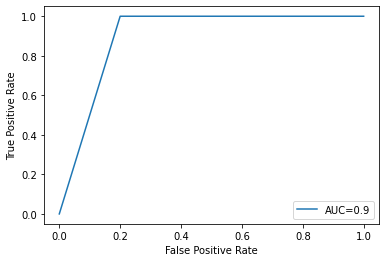

In [323]:
#Curva ROC e AUC
fpr, tpr, _ = metrics.roc_curve(y_val_norm,y_pred)
auc = metrics.roc_auc_score(y_val_norm,y_pred)
#Plotando a Curva Roc e AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###### Treine pelo menos mais 3 modelos de regressão logística diferentes, treinando e avaliando nos conjuntos de treino e validação. Modelos diferentes incluem usar atributos diferentes, transformações não-lineares nos atributos (regressão logística polinomial) ou diferentes hiperparâmetros. Após isso, escolha o melhor desses modelos para retreinar com todos os dados de treino e avalie no conjunto de teste. Compare com o resultado com a baseline. Dica: pode-se utilizar o grid search.

### Modelo 2 - Regressão Logística Polinomial

In [348]:
X = df_cancer_feature
y = df_cancer_target.to_numpy().reshape(-1,1)
# Definindo o grau e transformando os dados

#poly_reg = PolynomialFeatures(degree=3)
#X_poly = poly_reg.fit_transform(X)
X_poly = np.hstack((X,X**2,X**3))

In [349]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X_poly, y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)

#Utilizando o método de MinMAx do sklearn
scaler = MinMaxScaler()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)


In [350]:
model2 = LogisticRegression()
model2.fit(x_train_norm,y_train_norm.ravel())
y_pred2 = model.predict(x_val_norm).reshape(-1,1)

In [351]:
# Acurácia individualmente
metrics.accuracy_score(y_val_norm,y_pred2)  

0.967032967032967

In [352]:
# Resultados de Precisão, Recall, F1-Score e Acurácia
target_names = ['Maligno', 'Benigno']
print(metrics.classification_report(y_val_norm,y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     Maligno       0.97      0.95      0.96        38
     Benigno       0.96      0.98      0.97        53

    accuracy                           0.97        91
   macro avg       0.97      0.96      0.97        91
weighted avg       0.97      0.97      0.97        91



<AxesSubplot:>

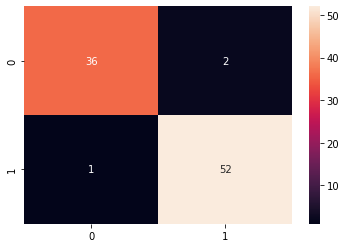

In [353]:
#Matriz de Confusão
cm = metrics.confusion_matrix(y_val_norm,y_pred2)
sns.heatmap(cm, annot=True, fmt = 'd')

In [354]:
print("AUC: %f\n" %(metrics.roc_auc_score(y_val_norm,y_pred2)))

AUC: 0.964250



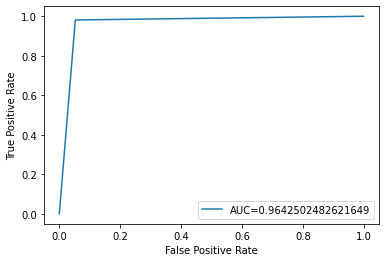

In [355]:
#Curva ROC e AUC
fpr, tpr, _ = metrics.roc_curve(y_val_norm,y_pred2)
auc = metrics.roc_auc_score(y_val_norm,y_pred2)
#Plotando a Curva Roc e AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Modelo 3 -- GridSearchCV

In [359]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)

#Utilizando o método de MinMAx do sklearn
scaler = MinMaxScaler()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

model3 = LogisticRegression()
model3.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [367]:
import warnings
warnings.filterwarnings("ignore")
# Definindo os parâmetros que serão utilizados no GridSearchCV
#C: Inverso da força de regularização; devendo ser um float positivo. Como em SVM, valores menores especificam uma regularização mais forte.
model3_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [300, 600, 1000],
    'tol':[0.01,0.001,0.0001]
}
meu_primeiro_grid =GridSearchCV(model3,model3_params,cv=5)

meu_primeiro_grid.fit(x_train_norm,y_train_norm.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [300, 600, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.01, 0.001, 0.0001]})

In [368]:
meu_primeiro_grid.best_estimator_
#Então os ajustes definidos para os hiperparâmetros após a aplicação do GridSearch, foram esses:

LogisticRegression(C=10, max_iter=300, tol=0.01)

In [369]:
y_pred3 = meu_primeiro_grid.predict(x_val_norm).reshape(-1,1)

In [370]:
print("Acurácia :",meu_primeiro_grid.best_score_)

Acurácia : 0.9780060882800609


In [371]:
# Resultados de Precisão, Recall, F1-Score e Acurácia
target_names = ['Maligno', 'Benigno']
print(metrics.classification_report(y_val_norm,y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     Maligno       0.97      0.97      0.97        34
     Benigno       0.98      0.98      0.98        57

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



<AxesSubplot:>

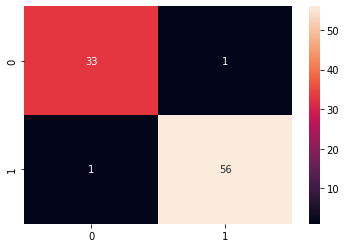

In [372]:
#Matriz de Confusão
cm = metrics.confusion_matrix(y_val_norm,y_pred3)
sns.heatmap(cm, annot=True, fmt = 'd')

In [373]:
print("AUC: %f\n" %(metrics.roc_auc_score(y_val_norm,y_pred3)))

AUC: 0.976522



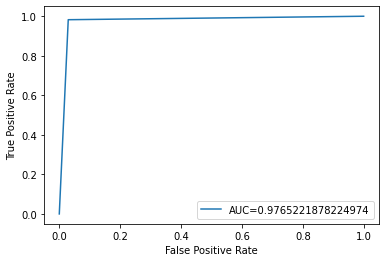

In [375]:
#Curva ROC e AUC
fpr, tpr, _ = metrics.roc_curve(y_val_norm,y_pred3)
auc = metrics.roc_auc_score(y_val_norm,y_pred3)
#Plotando a Curva Roc e AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Modelo 4